In [1]:
# importing the required libraries

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# reading data from given csv file into DataFrame
data = pd.read_csv('FyntraCustomerData.csv')

# dropping irrelevant features like Email, Address, Avatar
data.drop(['Email','Address','Avatar'],axis=1,inplace=True)

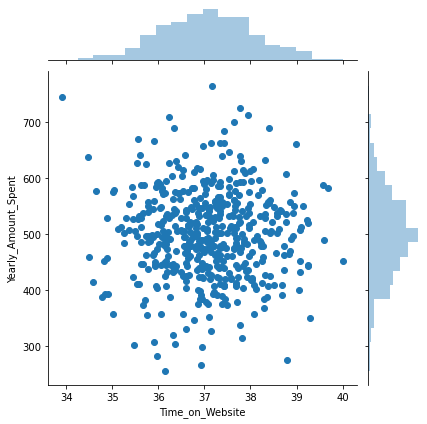

In [3]:
# jointplot of Time_on_Website vs Yearly_Amount_Spent

sns.jointplot(x=data.Time_on_Website,y=data.Yearly_Amount_Spent,kind='scatter')

The above plot says that there is no correlation between 'Time_on_Website' and 'Yearly_Amount_Spent'

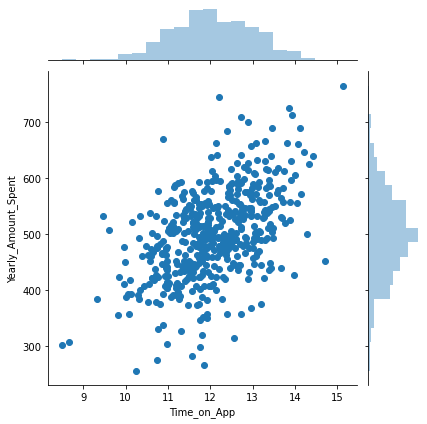

In [4]:
# jointplot of Time_on_App vs Yearly_Amount_Spent

sns.jointplot(x=data.Time_on_App,y=data.Yearly_Amount_Spent,kind='scatter')

The above plot says that there some correlation between 'Time_on_App' and 'Yearly_Amount_Spent'

So we can say that 'Time_on_App' is more corelated to 'Yearly_Amount_Spent' than 'Time_on_Website' is to 'Yearly_Amount_Spent'

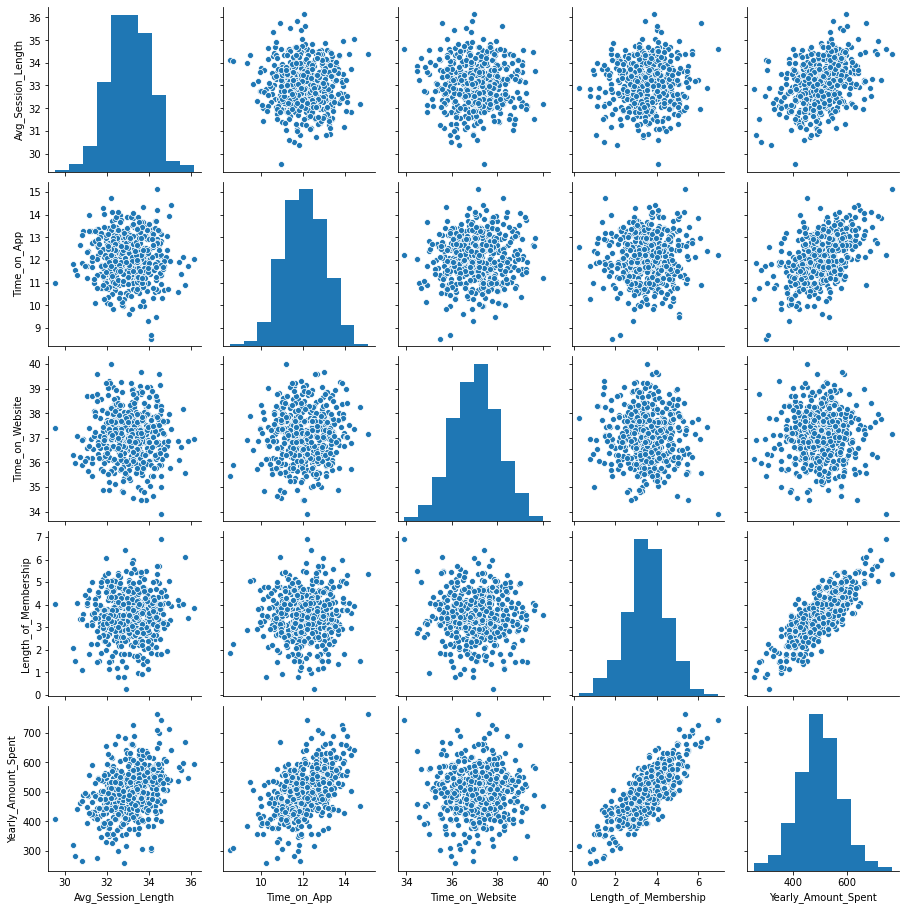

In [5]:
# pairwise plot of all the features of data

sns.pairplot(data)

From the above plot we can say that 'Length_of_Membership' is most correlated to 'Yearly_Amount_Spent'

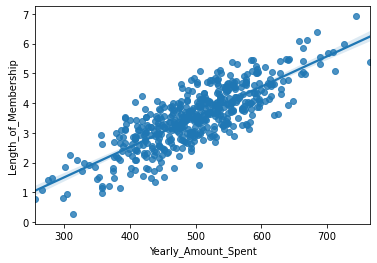

In [6]:
# Linear model plot of Yearly_Amount_Spent vs Length_of_Membership

sns.regplot(x='Yearly_Amount_Spent',y='Length_of_Membership',data=data)

From the above plot we can say that 'Yearly_Amount_Spent' is perfectly linearly dependent on 'Length_of_Membership'

In [7]:
# Preparing data and target for building a linear model
X = data.drop(['Yearly_Amount_Spent'],axis=1)
y = data['Yearly_Amount_Spent']

# splitting the data between training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=85)

# fitting a linear model to the train data
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

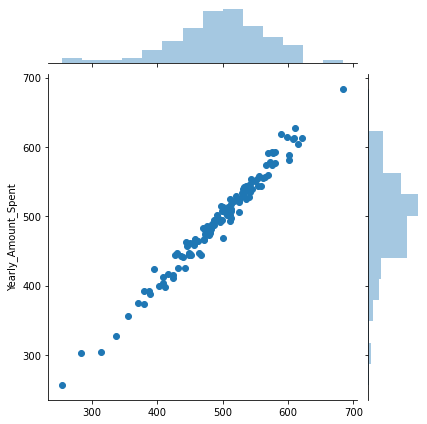

In [8]:
# plotting the predicted values and the original values

sns.jointplot(model.predict(X_test),y_test,kind='scatter')

The graph above is faily linear so we can say that our predicted values mostly match the original value

In [9]:
rms = pow(mean_squared_error(model.predict(X_test),y_test),0.5)
print('Root Mean Square Error is %.2f'%rms)

Root Mean Square Error is 10.32
